In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pysyncon import Dataprep, Synth, AugSynth
from pysyncon.utils import PlaceboTest

In [3]:
# All states:
states = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]
# States belonging to RGGI. Exclude VA here; it was only in RGGI for a short time
# Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, and Vermont 
rggi_states = ["CT", "DE", "ME", "MD", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
# States with cap-and-trade programs as well as AK and HI, which are of course outside the continental US.
other_states = ["CA", "AK", "HI"]
# States not belonging to RGGI or other cap-and-trade programs.
# WA will be included here because its cap-and-trade program was not around until after 2020.
control_states = list(set(states) - set(rggi_states) - set(other_states))

In [4]:
df = pd.read_csv(os.path.join("..", "..", "..", "SharedData", "total_state_data.csv"))
df.date = pd.to_datetime(df.date)
df = df[(df.date.dt.year>=1990)&(df.date.dt.year<2020)]
df.columns

Index(['state', 'state_sq_ft', 'year', 'month', 'date', 'monthly_population',
       'yearly_population', 'monthly_pop_density', 'yearly_pop_density',
       'monthly_emissions', 'monthly_emissions_sma', 'prcp', 'snow', 'tavg',
       'gdp_rel_2017', 'gdp_rel_2017_interp', 'yearly_gdp_rel_2017',
       'monthly_energy_prod', 'yearly_energy_prod', 'monthly_energy_use',
       'yearly_energy_use', 'monthly_energy_flow', 'yearly_energy_flow',
       'monthly_num_plants', 'yearly_num_plants', 'monthly_energy_total',
       'yearly_energy_total', 'monthly_energy_renew', 'yearly_energy_renew',
       'monthly_renew_pct', 'yearly_renew_pct', 'monthly_energy_fossil',
       'yearly_energy_fossil', 'monthly_fossil_pct', 'yearly_fossil_pct'],
      dtype='object')

In [22]:

control_ids = list(set(control_states) - set([state_id]))
rggi_ids = list(set(rggi_states) - set([state_id]))

# Do computations monthly
month_jumps = 1

# Set up ranges
UL = 2009
LL_TIME = 1997      # Time range over which to perform fit
LL_FEATURE = 1997   # Time range over which to perform predictor operations
# Special predictor ranges
LL_WEATHER = 1990
LL_GDP = 1997
LL_POPULATION = 1990
LL_ENERGY = 1990

treatment_date = pd.to_datetime('2009-01-01')

# these are the time values where CO2 per capita is fit
preintervention_time_range = df.date[(df.date>=pd.to_datetime('1990-06-01'))&(df.date<treatment_date)][::month_jumps]
preintervention_energy_range = df.date[(df.date.dt.year>=LL_ENERGY)&(df.date.dt.year<UL)][::month_jumps]    
preintervention_feature_range = df.date[(df.date.dt.year>=LL_FEATURE)&(df.date.dt.year<UL)][::month_jumps]
preintervention_weather_range = df.date[(df.date.dt.year>=LL_WEATHER)&(df.date.dt.year<UL)][::month_jumps]
preintervention_gdp_range = df.date[(df.date.dt.year>=LL_GDP)&(df.date.dt.year<UL)][::month_jumps]
preintervention_per_capita_range = df.date[(df.date.dt.year>=LL_POPULATION)&(df.date.dt.year<UL)][::month_jumps]
preintervention_ma_range = df.date[(df.date >= '1991-05-01') & (df.date<'2009-01-01')][::month_jumps]

years = pd.date_range(start='1990-01-01', end='2019-12-01', freq='MS').strftime('%Y-%m-%d').tolist()

In [ ]:
# Get per-capita values:
df['co2_per_capita']   = df['monthly_emissions'] / df['monthly_population']
df['gdp_per_capita']   = df['gdp_rel_2017_interp'] / df['monthly_population']
df['eprod_per_capita'] = df['monthly_energy_prod'] / df['monthly_population']
df['eflow_per_capita'] = df['monthly_energy_flow'] / df['monthly_population']

In [23]:
df['co2_emissions_per_capita_sma'] = (df['monthly_emissions'] / df['monthly_population']).rolling(window=12).mean()

In [ ]:
features = ['monthly_emissions', 'gdp_rel_2017_interp', 'monthly_energy_use', 'monthly_pop_density', 'monthly_emissions_sma']

State: CT 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


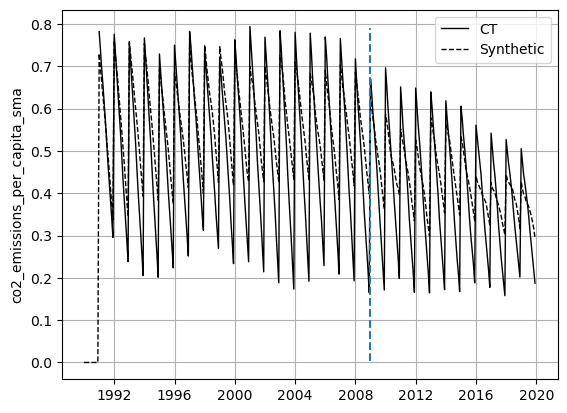

IL    0.227
VA    0.525
WA    0.247
Name: weights, dtype: float64 

0.011283985012028713
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.037   15.229     21.359       20.041
co2_emissions_per_capita_sma   0.024    0.496      0.572        1.285
special.1.eprod_per_capita     0.090    0.005      0.013        0.062
special.2.eflow_per_capita     0.033   -0.015     -0.012        0.029
special.3.gdp_per_capita       0.029    0.006      0.005        0.004
special.4.monthly_pop_density  0.241    0.002      0.007        0.034
special.5.yearly_renew_pct     0.000    0.016      0.201        0.125
special.6.yearly_fossil_pct    0.547    0.457      0.454        0.711
State: DE 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


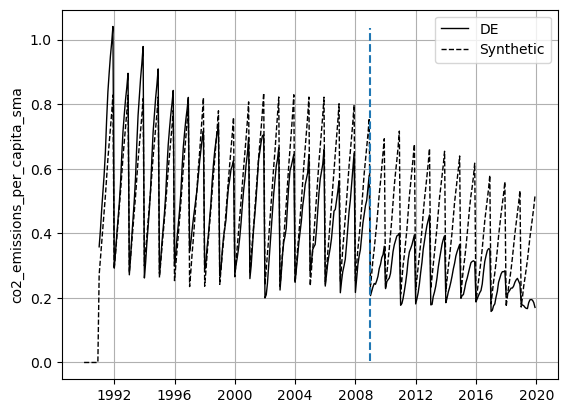

MN    0.071
TN    0.031
CO    0.858
NV    0.040
Name: weights, dtype: float64 

0.00826226851458933
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.156    7.840     18.584       20.041
co2_emissions_per_capita_sma   0.149    0.460      0.523        1.285
special.1.eprod_per_capita     0.171    0.000      0.027        0.062
special.2.eflow_per_capita     0.118   -0.030      0.003        0.029
special.3.gdp_per_capita       0.015    0.006      0.004        0.004
special.4.monthly_pop_density  0.140    0.003      0.026        0.034
special.5.yearly_renew_pct     0.110    0.000      0.051        0.125
special.6.yearly_fossil_pct    0.142    0.964      0.921        0.711
State: ME 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


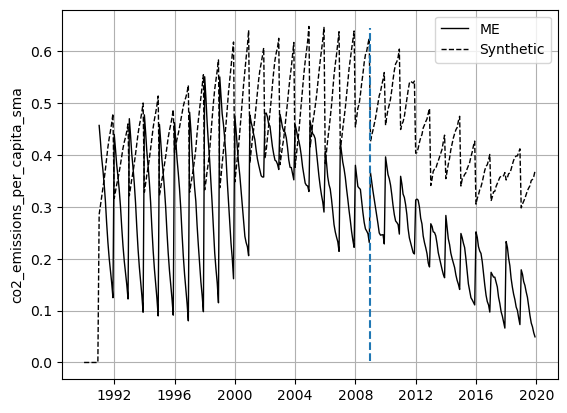

ID    0.118
WA    0.063
SC    0.584
SD    0.123
MI    0.112
Name: weights, dtype: float64 

0.048437691311907165
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.001    4.479     15.446       20.041
co2_emissions_per_capita_sma   0.152    0.354      0.499        1.285
special.1.eprod_per_capita     0.131    0.010      0.010        0.062
special.2.eflow_per_capita     0.158   -0.018     -0.019        0.029
special.3.gdp_per_capita       0.129    0.004      0.004        0.004
special.4.monthly_pop_density  0.150    0.028      0.027        0.034
special.5.yearly_renew_pct     0.101    0.240      0.243        0.125
special.6.yearly_fossil_pct    0.179    0.388      0.388        0.711
State: MD 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


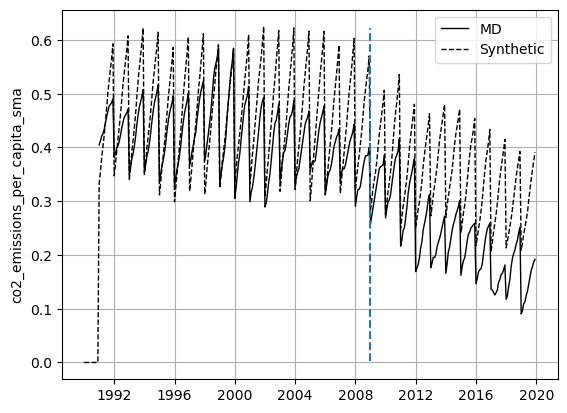

VA    0.137
WA    0.252
TN    0.110
CO    0.501
Name: weights, dtype: float64 

0.004699676695117322
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.123   13.000     14.744       20.041
co2_emissions_per_capita_sma   0.209    0.411      0.460        1.285
special.1.eprod_per_capita     0.109    0.004      0.020        0.062
special.2.eflow_per_capita     0.139   -0.018     -0.004        0.029
special.3.gdp_per_capita       0.198    0.004      0.004        0.004
special.4.monthly_pop_density  0.098    0.002      0.017        0.034
special.5.yearly_renew_pct     0.000    0.040      0.232        0.125
special.6.yearly_fossil_pct    0.123    0.679      0.664        0.711
State: MA 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


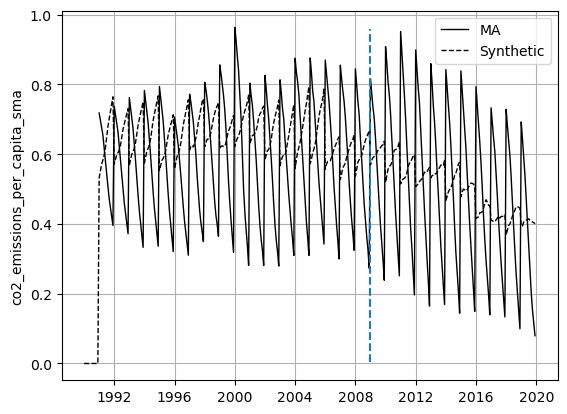

IL    0.637
NV    0.363
Name: weights, dtype: float64 

0.05509284977520226
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.167   26.167     29.607       20.041
co2_emissions_per_capita_sma   0.170    0.587      0.652        1.285
special.1.eprod_per_capita     0.051    0.001      0.009        0.062
special.2.eflow_per_capita     0.149   -0.018     -0.017        0.029
special.3.gdp_per_capita       0.191    0.005      0.005        0.004
special.4.monthly_pop_density  0.109    0.002      0.025        0.034
special.5.yearly_renew_pct     0.156    0.024      0.045        0.125
special.6.yearly_fossil_pct    0.008    0.823      0.635        0.711
State: NH 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


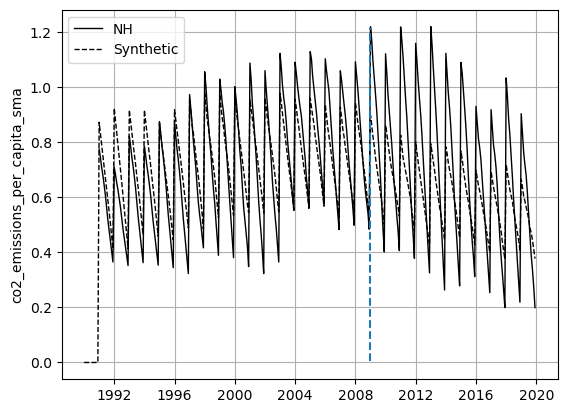

VA    0.275
WA    0.323
NE    0.119
SC    0.283
Name: weights, dtype: float64 

0.00976238160129337
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.091    4.486     13.802       20.041
co2_emissions_per_capita_sma   0.154    0.764      0.752        1.285
special.1.eprod_per_capita     0.087    0.008      0.011        0.062
special.2.eflow_per_capita     0.055   -0.011     -0.016        0.029
special.3.gdp_per_capita       0.280    0.004      0.004        0.004
special.4.monthly_pop_density  0.135    0.008      0.013        0.034
special.5.yearly_renew_pct     0.034    0.087      0.268        0.125
special.6.yearly_fossil_pct    0.164    0.362      0.396        0.711
State: NJ 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


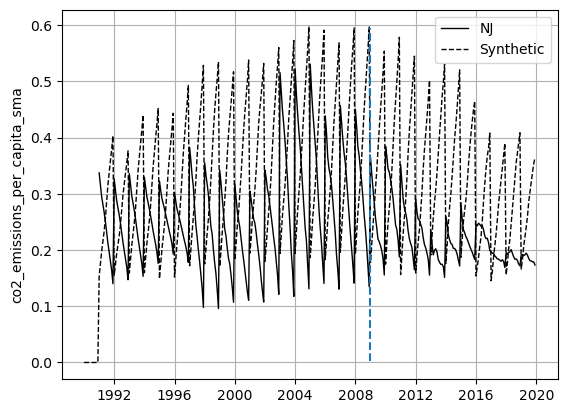

IL    0.742
VA    0.087
WA    0.172
Name: weights, dtype: float64 

0.044997103251047436
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.157   31.917     32.968       20.041
co2_emissions_per_capita_sma   0.199    0.270      0.370        1.285
special.1.eprod_per_capita     0.235    0.003      0.013        0.062
special.2.eflow_per_capita     0.111   -0.022     -0.013        0.029
special.3.gdp_per_capita       0.019    0.005      0.005        0.004
special.4.monthly_pop_density  0.264    0.001      0.006        0.034
special.5.yearly_renew_pct     0.008    0.000      0.135        0.125
special.6.yearly_fossil_pct    0.007    0.491      0.443        0.711
State: NY 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


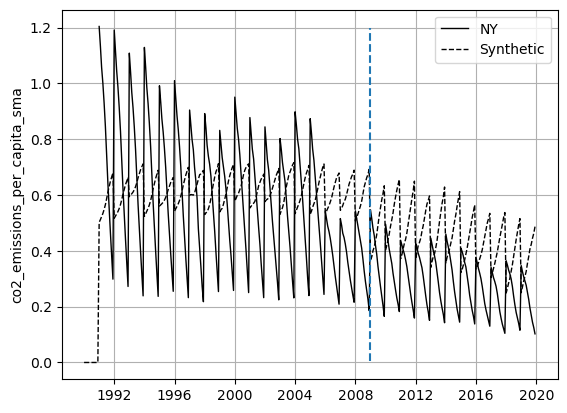

IL    0.157
WA    0.252
TX    0.591
Name: weights, dtype: float64 

0.08081235943127349
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.184   69.424     66.298       20.041
co2_emissions_per_capita_sma   0.105    0.526      0.619        1.285
special.1.eprod_per_capita     0.125    0.003      0.028        0.062
special.2.eflow_per_capita     0.134   -0.014     -0.009        0.029
special.3.gdp_per_capita       0.000    0.005      0.004        0.004
special.4.monthly_pop_density  0.153    0.003      0.012        0.034
special.5.yearly_renew_pct     0.166    0.195      0.201        0.125
special.6.yearly_fossil_pct    0.133    0.544      0.633        0.711
State: PA 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


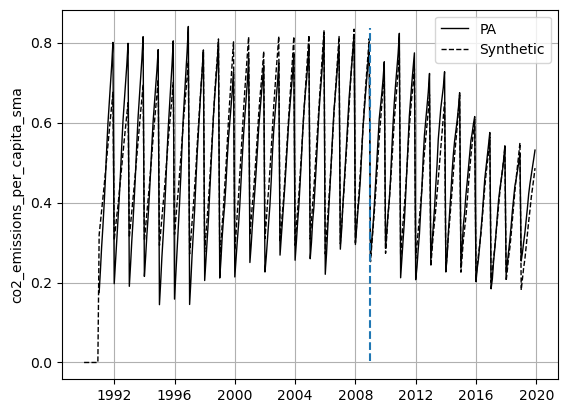

IL    0.291
FL    0.179
OH    0.128
WV    0.021
SC    0.240
MI    0.139
Name: weights, dtype: float64 

0.0032788215243493087
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.000   61.792     34.936       20.041
co2_emissions_per_capita_sma   0.161    0.513      0.547        1.285
special.1.eprod_per_capita     0.135    0.019      0.013        0.062
special.2.eflow_per_capita     0.129   -0.008     -0.014        0.029
special.3.gdp_per_capita       0.146    0.004      0.004        0.004
special.4.monthly_pop_density  0.115    0.004      0.006        0.034
special.5.yearly_renew_pct     0.155    0.013      0.013        0.125
special.6.yearly_fossil_pct    0.159    0.624      0.623        0.711
State: RI 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


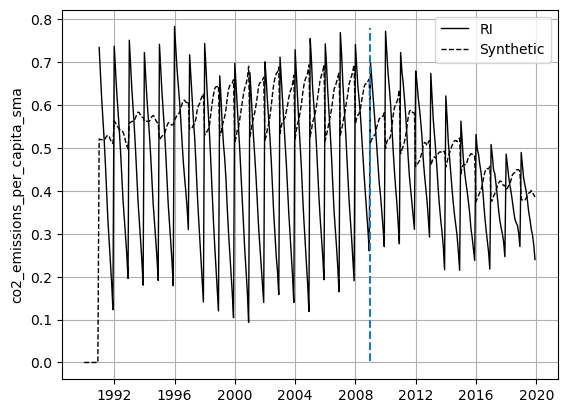

IL    0.225
VA    0.305
TN    0.064
SC    0.406
Name: weights, dtype: float64 

0.0674107526536467
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.011    4.542     23.998       20.041
co2_emissions_per_capita_sma   0.201    0.436      0.603        1.285
special.1.eprod_per_capita     0.155    0.000      0.013        0.062
special.2.eflow_per_capita     0.119   -0.017     -0.015        0.029
special.3.gdp_per_capita       0.104    0.004      0.004        0.004
special.4.monthly_pop_density  0.211    0.001      0.007        0.034
special.5.yearly_renew_pct     0.198    0.002      0.024        0.125
special.6.yearly_fossil_pct    0.000    0.976      0.495        0.711
State: VT 



/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


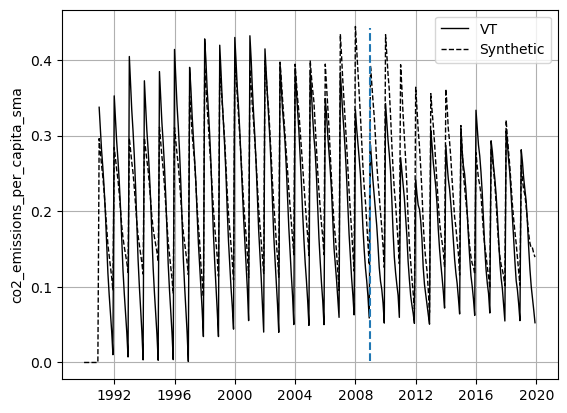

ID    0.345
WA    0.655
Name: weights, dtype: float64 

0.0028689444545315864
                                   V  treated  synthetic  sample mean
monthly_num_plants             0.162    1.000      3.453       20.041
co2_emissions_per_capita_sma   0.090    0.224      0.257        1.285
special.1.eprod_per_capita     0.149    0.008      0.006        0.062
special.2.eflow_per_capita     0.191   -0.012     -0.018        0.029
special.3.gdp_per_capita       0.026    0.004      0.004        0.004
special.4.monthly_pop_density  0.198    0.016      0.031        0.034
special.5.yearly_renew_pct     0.004    0.202      0.809        0.125
special.6.yearly_fossil_pct    0.181    0.007      0.115        0.711


In [24]:
for state in rggi_states:

    dataprep = Dataprep(
        foo=df,
        predictors=['monthly_num_plants', 'co2_emissions_per_capita_sma'],
        predictors_op="mean",
        time_predictors_prior=preintervention_feature_range,
        special_predictors=[
            ('eprod_per_capita', preintervention_energy_range, "mean"),
            ('eflow_per_capita', preintervention_energy_range, "mean"),
            ('gdp_per_capita', preintervention_gdp_range, "mean"),
            ('monthly_pop_density', preintervention_per_capita_range, "mean"),
            ('yearly_renew_pct', preintervention_energy_range, "mean"),
            ('yearly_fossil_pct', preintervention_energy_range, "mean")
            ],
        dependent="co2_emissions_per_capita_sma",
        unit_variable="state",
        time_variable="date",
        treatment_identifier=state,
        controls_identifier=control_states,
        time_optimize_ssr=preintervention_ma_range
        )
    
    # Fit synth() object
    
    synth = Synth()
    synth.fit(dataprep=dataprep)

    print('State:', state,'\n')
    synth.path_plot(time_period=years, treatment_time=treatment_date)
    print(synth.weights(threshold=.01),'\n')
    print(synth.loss_V)
    print(synth.summary())

We now implement an AugSynth for each of the RGGI states:

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


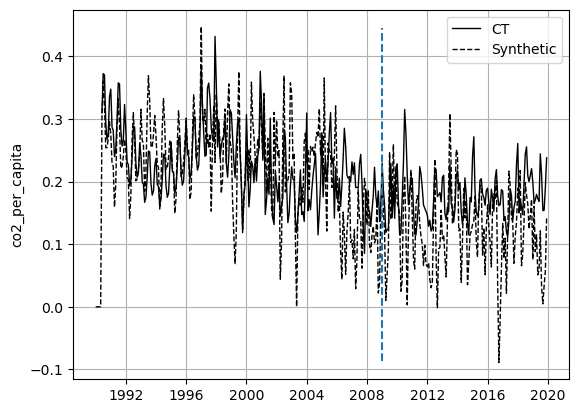

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


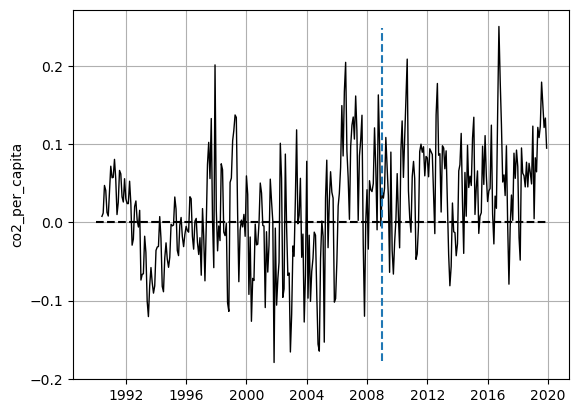

State: CT 

monthly_emissions SMA version: 

IL    0.289
KS    0.012
ID    0.265
IA    0.056
NC    0.138
VA    0.314
IN    0.045
OH    0.051
MN    0.215
WA    0.071
MO    0.074
GA    0.187
AZ    0.016
WY    0.057
NE    0.112
WI    0.054
CO    0.161
MI    0.012
NV    0.180
LA    0.130
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants              15.229     17.941       20.041
special.1.eprod_per_capita       0.005      0.021        0.062
special.2.eflow_per_capita      -0.015     -0.007        0.029
special.3.gdp_per_capita         0.006      0.006        0.004
special.4.monthly_pop_density    0.002      0.004        0.034
special.5.yearly_renew_pct       0.016      0.087        0.125
special.6.yearly_fossil_pct      0.457      0.494        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


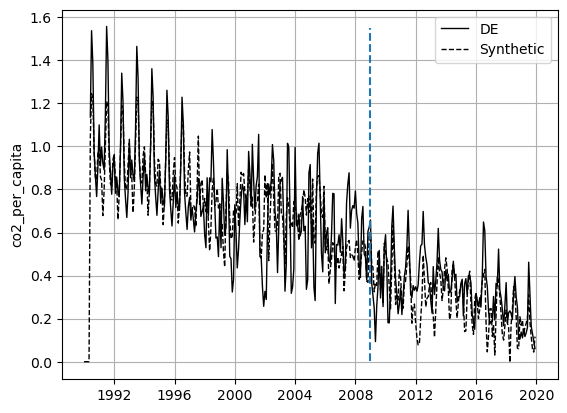

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


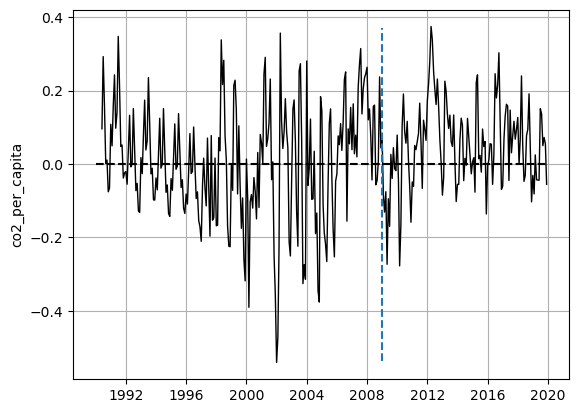

State: DE 

monthly_emissions SMA version: 

IL    0.136
KS    0.037
IA    0.088
NC    0.105
KY    0.013
VA    0.415
IN    0.061
OH    0.069
MN    0.110
WA    0.203
MO    0.018
GA    0.362
WY    0.020
OK    0.053
NE    0.068
TN    0.024
WV    0.045
SD    0.049
CO    0.213
NV    0.564
LA    0.138
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants               7.840     11.917       20.041
special.1.eprod_per_capita       0.000      0.021        0.062
special.2.eflow_per_capita      -0.030     -0.006        0.029
special.3.gdp_per_capita         0.006      0.006        0.004
special.4.monthly_pop_density    0.003      0.003        0.034
special.5.yearly_renew_pct       0.000     -0.059        0.125
special.6.yearly_fossil_pct      0.964      0.921        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


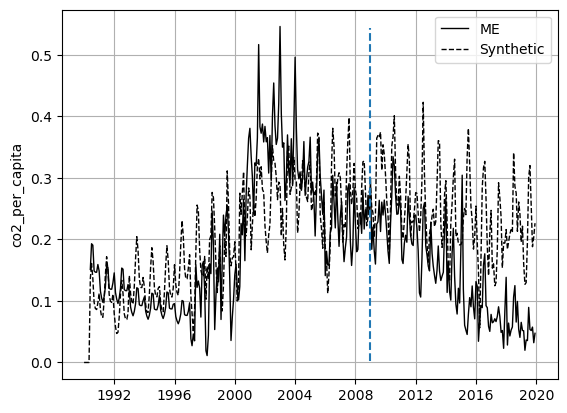

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


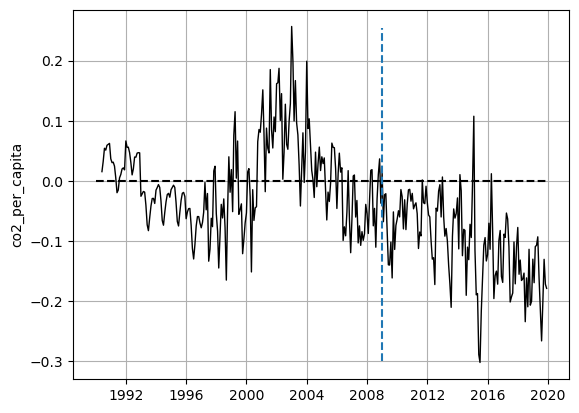

State: ME 

monthly_emissions SMA version: 

IL    0.057
KS    0.134
ID    0.366
IA    0.022
NC    0.021
VA    0.090
OH    0.014
MS    0.140
MN    0.087
MO    0.046
AZ    0.040
NM    0.021
OR    0.190
NE    0.061
TN    0.011
WI    0.032
SC    0.092
CO    0.045
ND    0.016
MI    0.032
LA    0.013
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants               4.479      5.849       20.041
special.1.eprod_per_capita       0.010     -0.011        0.062
special.2.eflow_per_capita      -0.018     -0.037        0.029
special.3.gdp_per_capita         0.004      0.004        0.004
special.4.monthly_pop_density    0.028      0.030        0.034
special.5.yearly_renew_pct       0.240      0.321        0.125
special.6.yearly_fossil_pct      0.388      0.403        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


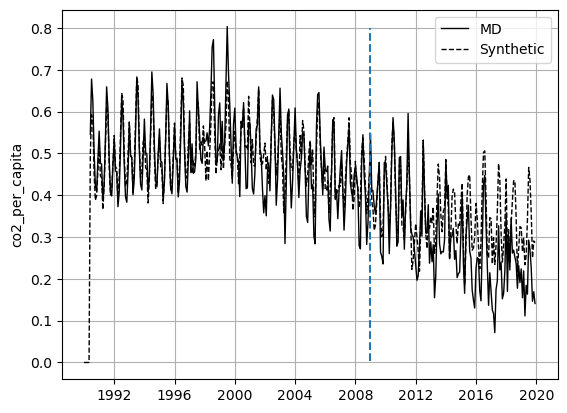

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


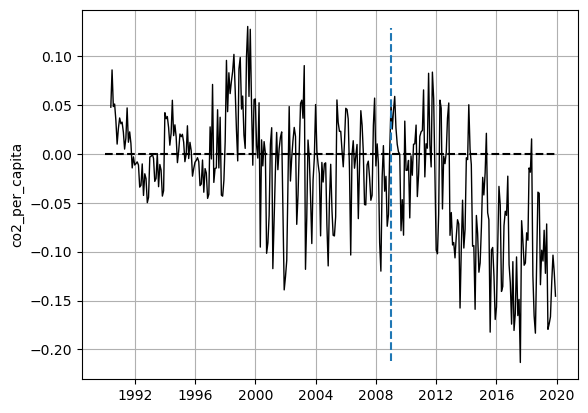

State: MD 

monthly_emissions SMA version: 

ID    0.114
FL    0.014
NC    0.265
VA    0.419
SD    0.119
NV    0.068
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants              13.000     16.586       20.041
special.1.eprod_per_capita       0.004      0.009        0.062
special.2.eflow_per_capita      -0.018     -0.017        0.029
special.3.gdp_per_capita         0.004      0.004        0.004
special.4.monthly_pop_density    0.002      0.028        0.034
special.5.yearly_renew_pct       0.040      0.197        0.125
special.6.yearly_fossil_pct      0.679      0.539        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


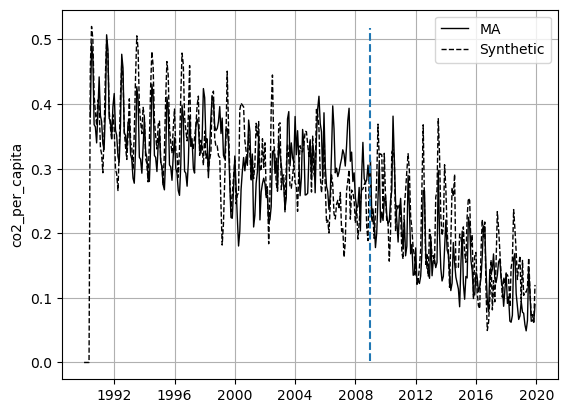

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


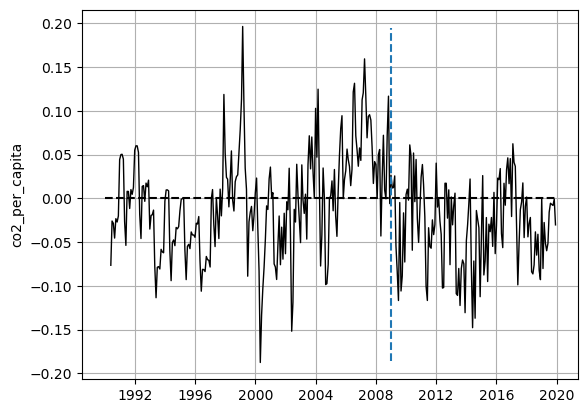

State: MA 

monthly_emissions SMA version: 

IL    0.104
KS    0.022
ID    0.164
IA    0.073
FL    0.015
NC    0.070
VA    0.129
IN    0.056
OH    0.091
MN    0.112
WA    0.109
MO    0.081
GA    0.057
UT    0.062
TX    0.014
NE    0.047
WI    0.057
CO    0.147
MI    0.156
NV    0.145
LA    0.062
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants              26.167     27.569       20.041
special.1.eprod_per_capita       0.001     -0.003        0.062
special.2.eflow_per_capita      -0.018     -0.031        0.029
special.3.gdp_per_capita         0.005      0.005        0.004
special.4.monthly_pop_density    0.002      0.007        0.034
special.5.yearly_renew_pct       0.024      0.091        0.125
special.6.yearly_fossil_pct      0.823      0.721        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


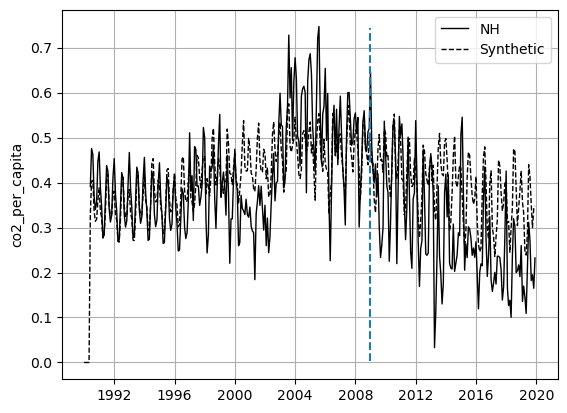

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


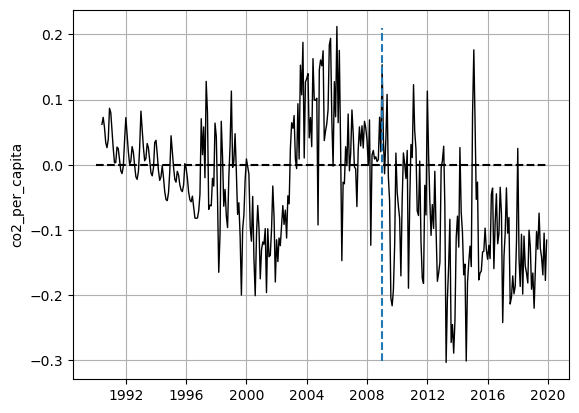

State: NH 

monthly_emissions SMA version: 

IL    0.203
ID    0.144
MN    0.115
WA    0.159
MO    0.130
OR    0.185
SD    0.062
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants               4.486     15.464       20.041
special.1.eprod_per_capita       0.008      0.006        0.062
special.2.eflow_per_capita      -0.011     -0.019        0.029
special.3.gdp_per_capita         0.004      0.004        0.004
special.4.monthly_pop_density    0.008      0.028        0.034
special.5.yearly_renew_pct       0.087      0.433        0.125
special.6.yearly_fossil_pct      0.362      0.389        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


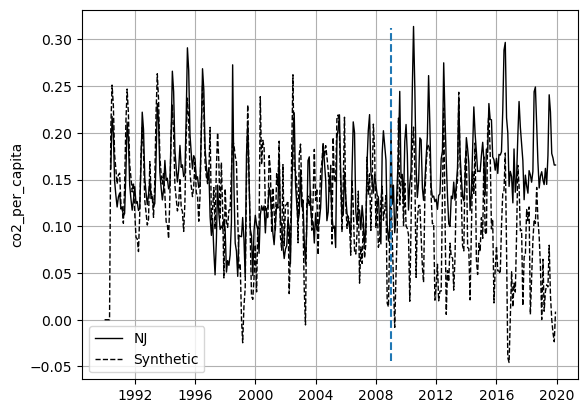

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


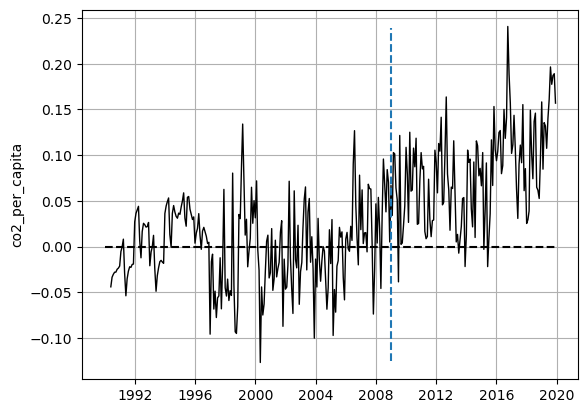

State: NJ 

monthly_emissions SMA version: 

IL    0.316
KS    0.017
ID    0.401
IA    0.056
NC    0.093
VA    0.259
OH    0.085
MN    0.191
MO    0.043
GA    0.136
AZ    0.050
WY    0.031
NE    0.071
WI    0.052
SC    0.022
CO    0.121
MI    0.076
NV    0.087
LA    0.113
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants              31.917     32.148       20.041
special.1.eprod_per_capita       0.003      0.009        0.062
special.2.eflow_per_capita      -0.022     -0.022        0.029
special.3.gdp_per_capita         0.005      0.005        0.004
special.4.monthly_pop_density    0.001      0.002        0.034
special.5.yearly_renew_pct       0.000      0.047        0.125
special.6.yearly_fossil_pct      0.491      0.513        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


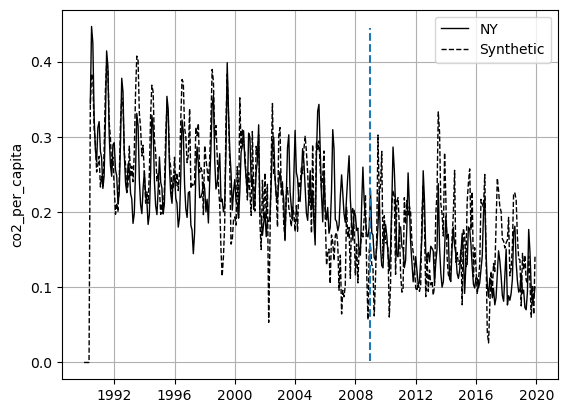

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


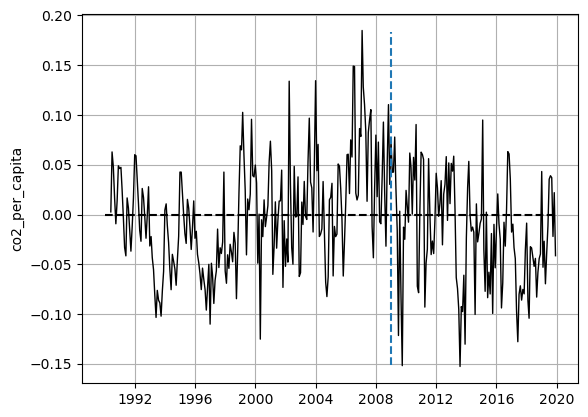

State: NY 

monthly_emissions SMA version: 

IL    0.217
ID    0.315
IA    0.043
FL    0.134
NC    0.032
VA    0.179
IN    0.057
OH    0.080
MN    0.093
WA    0.151
MO    0.052
GA    0.082
WY    0.042
TX    0.323
NE    0.021
WI    0.049
CO    0.088
MI    0.072
NV    0.114
LA    0.067
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants              69.424     58.515       20.041
special.1.eprod_per_capita       0.003      0.024        0.062
special.2.eflow_per_capita      -0.014     -0.009        0.029
special.3.gdp_per_capita         0.005      0.005        0.004
special.4.monthly_pop_density    0.003      0.002        0.034
special.5.yearly_renew_pct       0.195      0.219        0.125
special.6.yearly_fossil_pct      0.544      0.543        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


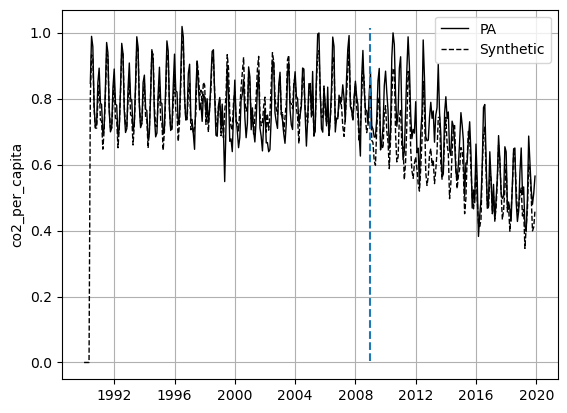

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


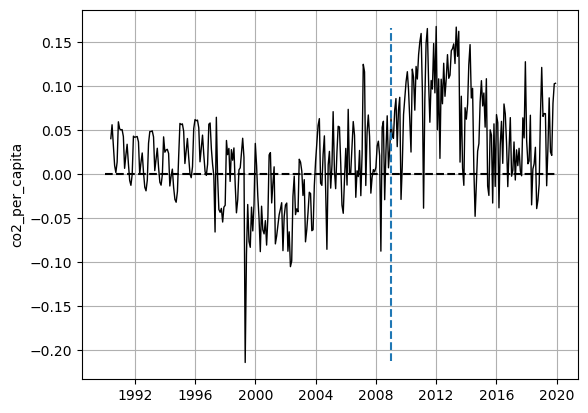

State: PA 

monthly_emissions SMA version: 

ID    0.011
NC    0.107
VA    0.073
OH    0.251
MN    0.085
WA    0.014
OK    0.073
CO    0.192
MI    0.158
NV    0.028
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants              61.792     24.180       20.041
special.1.eprod_per_capita       0.019      0.016        0.062
special.2.eflow_per_capita      -0.008     -0.011        0.029
special.3.gdp_per_capita         0.004      0.004        0.004
special.4.monthly_pop_density    0.004      0.015        0.034
special.5.yearly_renew_pct       0.013      0.052        0.125
special.6.yearly_fossil_pct      0.624      0.793        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


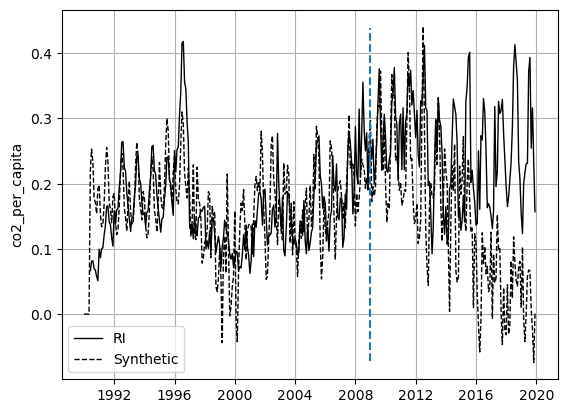

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


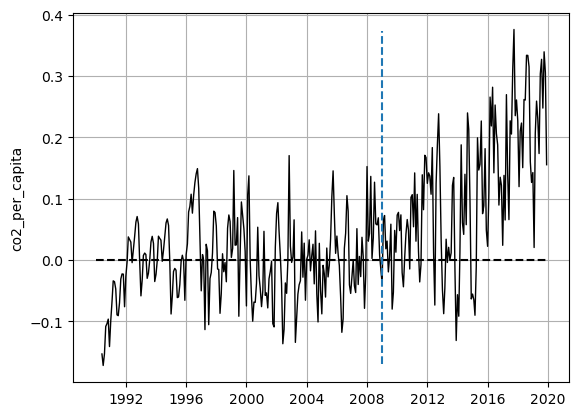

State: RI 

monthly_emissions SMA version: 

KS    0.020
ID    0.166
IA    0.200
FL    0.072
NC    0.122
KY    0.052
VA    0.151
OH    0.280
MS    0.058
MN    0.060
WA    0.022
MO    0.165
NM    0.097
UT    0.124
OK    0.190
NE    0.045
WI    0.144
CO    0.322
MI    0.193
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants               4.542      5.548       20.041
special.1.eprod_per_capita       0.000     -0.016        0.062
special.2.eflow_per_capita      -0.017     -0.033        0.029
special.3.gdp_per_capita         0.004      0.004        0.004
special.4.monthly_pop_density    0.001      0.002        0.034
special.5.yearly_renew_pct       0.002      0.012        0.125
special.6.yearly_fossil_pct      0.976      0.933        0.711


/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


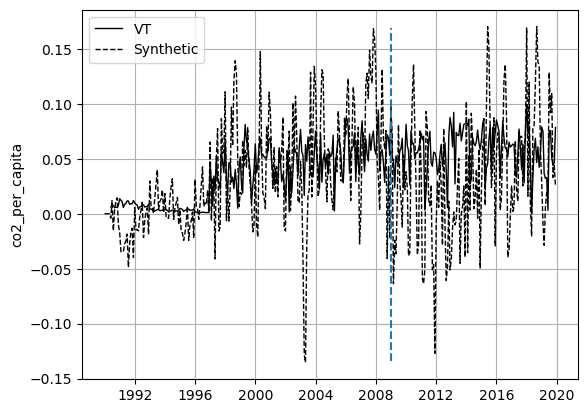

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/pysyncon/dataprep.py:302: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Z = self.foo[self.foo[self.time_variable].isin(time_period)].pivot(


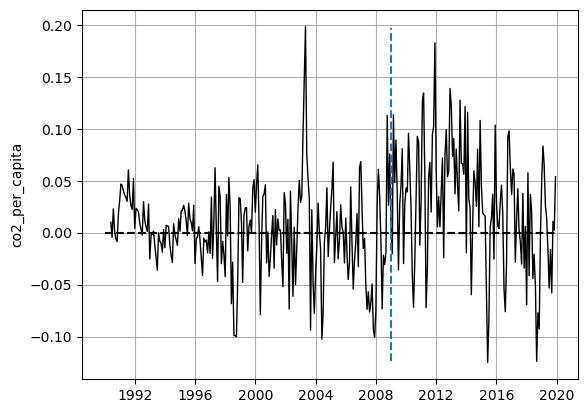

State: VT 

monthly_emissions SMA version: 

IL    0.271
ID    0.605
FL    0.020
NC    0.118
VA    0.269
MN    0.229
AZ    0.206
UT    0.045
AR    0.110
WY    0.030
TN    0.140
WI    0.035
SC    0.464
MI    0.256
Name: weights, dtype: float64 

                               treated  synthetic  sample mean
monthly_num_plants               1.000      1.236       20.041
special.1.eprod_per_capita       0.008      0.008        0.062
special.2.eflow_per_capita      -0.012     -0.014        0.029
special.3.gdp_per_capita         0.004      0.004        0.004
special.4.monthly_pop_density    0.016      0.019        0.034
special.5.yearly_renew_pct       0.202      0.231        0.125
special.6.yearly_fossil_pct      0.007      0.035        0.711


In [ ]:
for state in rggi_states:

    dataprep = Dataprep(
        foo=df,
        predictors=['monthly_num_plants'],
        predictors_op="mean",
        time_predictors_prior=preintervention_feature_range,
        special_predictors=[
            ('eprod_per_capita', preintervention_energy_range, "mean"),
            ('eflow_per_capita', preintervention_energy_range, "mean"),
            ('gdp_per_capita', preintervention_gdp_range, "mean"),
            ('monthly_pop_density', preintervention_per_capita_range, "mean"),
            ('yearly_renew_pct', preintervention_energy_range, "mean"),
            ('yearly_fossil_pct', preintervention_energy_range, "mean")
            ],
        dependent="co2_per_capita",
        unit_variable="state",
        time_variable="date",
        treatment_identifier=state,
        controls_identifier=control_states,
        time_optimize_ssr=preintervention_time_range
        )
    
    # Augmented Synthetic Control Method
    
    synth_aug = AugSynth()
    synth_aug.fit(dataprep=dataprep)

    synth_aug.path_plot(time_period=years, treatment_time=treatment_date)
    synth_aug.gaps_plot(time_period=years, treatment_time=treatment_date)

    print('State:', state,'\n')
    print('monthly_emissions:','\n')
    print(synth_aug.loss_V)
    print(synth_aug.weights(threshold=.01),'\n')
    print(synth_aug.summary())